   # hapPyness: Project One 
 Team Boa 
       (Aashita, 
       Alannah,
       Ben,
       and Brian)

Charles Schulz once said that “happiness is a warm puppy”. According to Walt Disney, “happiness is a state of mind” and author, Tom Bodett, offered that "a person needs just three things to be truly happy in this world: Someone to love, something to do, and something to hope for.” For many, happiness is hard to quantify. However, in 2012 the first World Happiness Report was published based on Gallup poll data. This report uses six factors to measure happiness: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. (Tom may have been on to something.)

Our team will be analyzing this data to determine correlations between metrics (such as the relationship between GDP per capita and the happiness index, and life expectancy vs freedom) and across years. We will also focus on the position of the United States on the list, seeing just how we measure up to the happiest and uphappiest nations to start, then going on to further analyze the metrics to see what story they tell. It will also be interesting to see how 2020 measures up to years prior, considering the Covid-19 pandemic, widespread social unrest, and the general consensus that it was a terrible year.

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
# Store csv file paths in variables
path_2016 = "../Resources/clean_data_2016.csv"
path_2017 = "../Resources/clean_data_2017.csv"
path_2018 = "../Resources/clean_data_2018.csv"
path_2019 = "../Resources/clean_data_2019.csv"
path_2020 = "../Resources/clean_data_2020.csv"
path_all_years = "../Resources/clean_data_all_years.csv"

In [3]:
# Import data from csv files
clean_data_2016_df = pd.read_csv(path_2016)
clean_data_2017_df = pd.read_csv(path_2017)
clean_data_2018_df = pd.read_csv(path_2018)
clean_data_2019_df = pd.read_csv(path_2019)
clean_data_2020_df = pd.read_csv(path_2020)
clean_data_all_years_df = pd.read_csv(path_all_years)


av2016 = clean_data_2016_df['Freedom to Make Choices'].mean()
av2017 = clean_data_2017_df['Freedom to Make Choices'].mean()
av2018 = clean_data_2018_df['Freedom to Make Choices'].mean()
av2019 = clean_data_2019_df['Freedom to Make Choices'].mean()
av2020 = clean_data_2020_df['Freedom to Make Choices'].mean()
avg_free = {'Country': ['World Average', 'World Average', 'World Average', 'World Average', 'World Average'],
            'Freedom to Make Choices': [av2016, av2017, av2018, av2019, av2020],
            'Year': [2016, 2017, 2018, 2019, 2020]}
avg_free_df = pd.DataFrame(avg_free)



av2016_lf = clean_data_2016_df['Health/Life Expectancy'].mean()
av2017_lf = clean_data_2017_df['Health/Life Expectancy'].mean()
av2018_lf = clean_data_2018_df['Health/Life Expectancy'].mean()
av2019_lf = clean_data_2019_df['Health/Life Expectancy'].mean()
av2020_lf = clean_data_2020_df['Health/Life Expectancy'].mean()
avg_life = {'Country': ['World Average', 'World Average', 'World Average', 'World Average', 'World Average'],
            'Health/Life Expectancy': [av2016_lf, av2017_lf, av2018_lf, av2019_lf, av2020_lf],
            'Year': [2016, 2017, 2018, 2019, 2020]}
avg_life_df = pd.DataFrame(avg_life)
avg_life_df

,Country,Health/Life Expectancy,Year
0,World Average,0.557619,2016
1,World Average,0.551341,2017
2,World Average,0.597346,2018
3,World Average,0.725244,2019
4,World Average,0.692869,2020


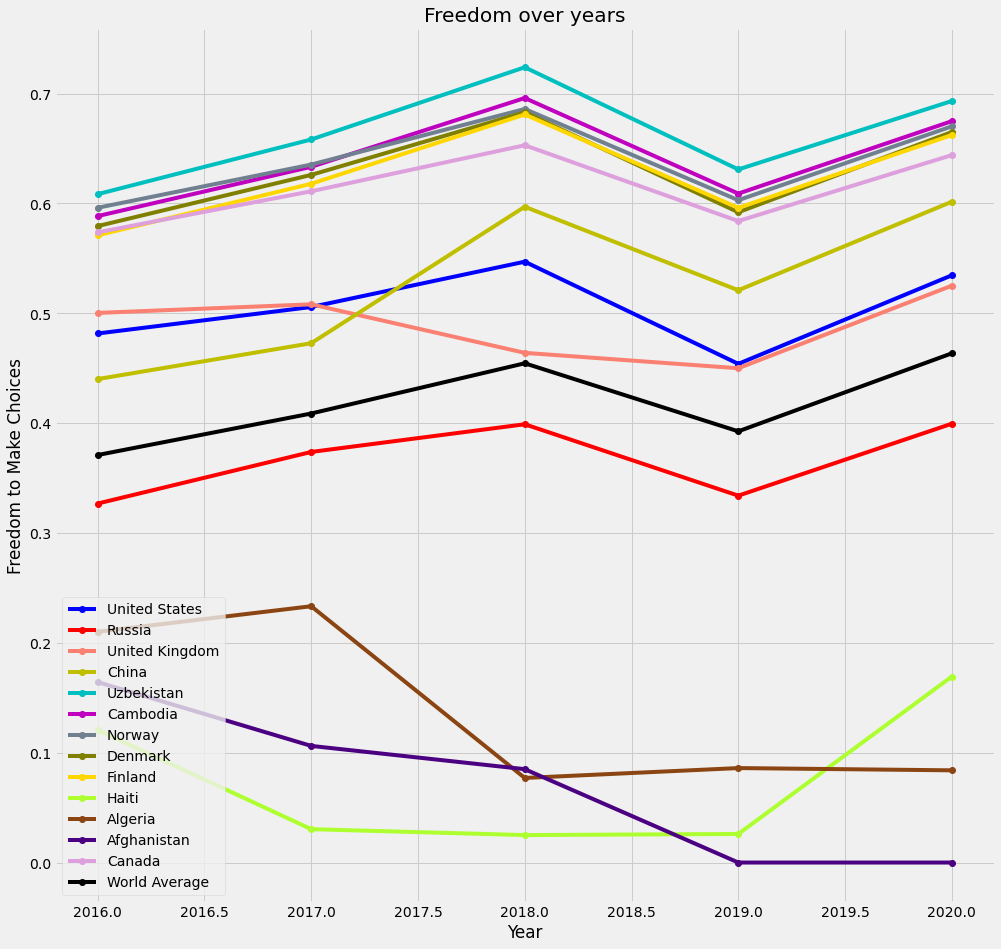

In [4]:
usa = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'United States')])
usa_df = usa[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]
china = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'China')])
china_df = china[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]           
russia = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Russia')])
russia_df = russia[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]           
uk = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'United Kingdom')])
uk_df = uk[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]  
uzbekistan = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Uzbekistan')])
uzbekistan_df = uzbekistan[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]  
cambodia = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Cambodia')])
cambodia_df = cambodia[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]  
norway = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Norway')])
norway_df = norway[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]  
denmark = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Denmark')])
denmark_df = denmark[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']]  
finland = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Finland')])
finland_df = finland[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']] 
haiti = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Haiti')])
haiti_df = haiti[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']] 
algeria = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Algeria')])
algeria_df = algeria[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']] 
afghanistan = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Afghanistan')])
afghanistan_df = afghanistan[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']] 
canada = pd.DataFrame(clean_data_all_years_df.loc[(clean_data_all_years_df["Country"] == 'Canada')])
canada_df = canada[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices', 'Year']] 


plt.figure(figsize=(15, 15))
plt.plot(usa_df['Year'], usa_df['Freedom to Make Choices'], marker = 'o', color='b')
plt.plot(russia_df['Year'], russia_df['Freedom to Make Choices'], marker = 'o', color='r')
plt.plot(uk_df['Year'], uk_df['Freedom to Make Choices'], marker = 'o', color='salmon')
plt.plot(china_df['Year'], china_df['Freedom to Make Choices'], marker = 'o', color='y')
plt.plot(uzbekistan_df['Year'], uzbekistan_df['Freedom to Make Choices'], marker = 'o', color='c')
plt.plot(cambodia_df['Year'], cambodia_df['Freedom to Make Choices'], marker = 'o', color='m')
plt.plot(norway_df['Year'], norway_df['Freedom to Make Choices'], marker = 'o', color='slategrey')
plt.plot(denmark_df['Year'], denmark_df['Freedom to Make Choices'], marker = 'o', color='olive')
plt.plot(finland_df['Year'], finland_df['Freedom to Make Choices'], marker = 'o', color='gold')
plt.plot(haiti_df['Year'], haiti_df['Freedom to Make Choices'], marker = 'o', color='greenyellow')
plt.plot(algeria_df['Year'], algeria_df['Freedom to Make Choices'], marker = 'o', color='saddlebrown')
plt.plot(afghanistan_df['Year'], afghanistan_df['Freedom to Make Choices'], marker = 'o', color='indigo')
plt.plot(canada_df['Year'], canada_df['Freedom to Make Choices'], marker = 'o', color='plum')
plt.plot(avg_free_df['Year'], avg_free_df['Freedom to Make Choices'], marker = 'o', color='k')

countries = ['United States','Russia','United Kingdom','China','Uzbekistan','Cambodia','Norway','Denmark','Finland','Haiti','Algeria','Afghanistan','Canada','World Average']


plt.xlabel("Year")
plt.ylabel("Freedom to Make Choices")
plt.title("Freedom over years")
plt.legend(countries, loc='best')
plt.show()


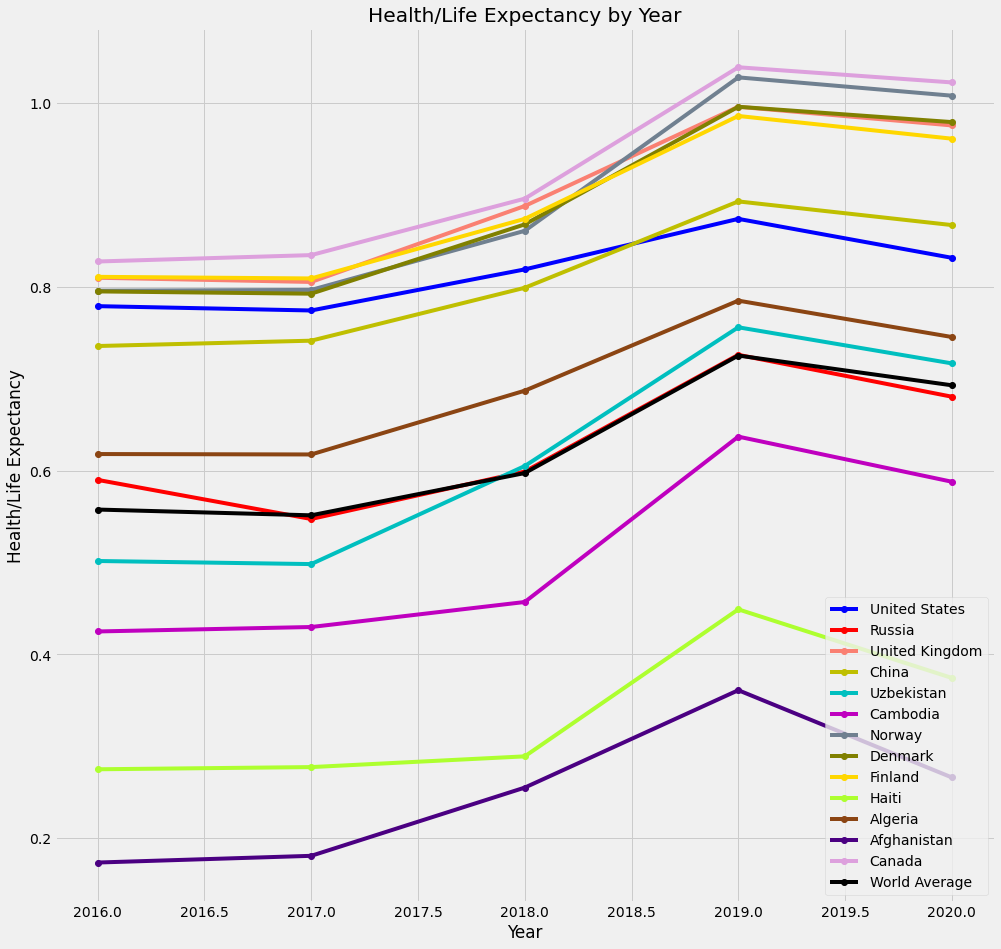

In [6]:
plt.figure(figsize=(15, 15))
plt.plot(usa_df['Year'], usa_df['Health/Life Expectancy'], marker = 'o', color='b')
plt.plot(russia_df['Year'], russia_df['Health/Life Expectancy'], marker = 'o', color='r')
plt.plot(uk_df['Year'], uk_df['Health/Life Expectancy'], marker = 'o', color='salmon')
plt.plot(china_df['Year'], china_df['Health/Life Expectancy'], marker = 'o', color='y')
plt.plot(uzbekistan_df['Year'], uzbekistan_df['Health/Life Expectancy'], marker = 'o', color='c')
plt.plot(cambodia_df['Year'], cambodia_df['Health/Life Expectancy'], marker = 'o', color='m')
plt.plot(norway_df['Year'], norway_df['Health/Life Expectancy'], marker = 'o', color='slategrey')
plt.plot(denmark_df['Year'], denmark_df['Health/Life Expectancy'], marker = 'o', color='olive')
plt.plot(finland_df['Year'], finland_df['Health/Life Expectancy'], marker = 'o', color='gold')
plt.plot(haiti_df['Year'], haiti_df['Health/Life Expectancy'], marker = 'o', color='greenyellow')
plt.plot(algeria_df['Year'], algeria_df['Health/Life Expectancy'], marker = 'o', color='saddlebrown')
plt.plot(afghanistan_df['Year'], afghanistan_df['Health/Life Expectancy'], marker = 'o', color='indigo')
plt.plot(canada_df['Year'], canada_df['Health/Life Expectancy'], marker = 'o', color='plum')
plt.plot(avg_life_df['Year'], avg_life_df['Health/Life Expectancy'], marker = 'o', color='k')

countries = ['United States','Russia','United Kingdom','China','Uzbekistan','Cambodia','Norway','Denmark','Finland','Haiti','Algeria','Afghanistan','Canada','World Average']


plt.xlabel("Year")
plt.ylabel('Health/Life Expectancy')
plt.title("Health/Life Expectancy by Year")
plt.legend(countries, loc='best')
plt.show()

In [ ]:
year = [2016,2017,2018,2019,2020]
fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())

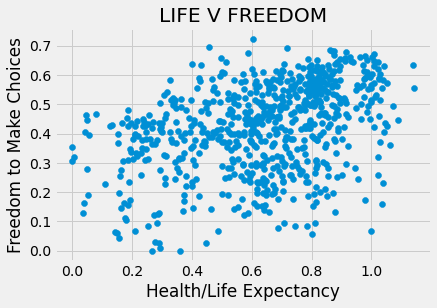

In [7]:
clean_data_all_years_df

life_freedom = clean_data_all_years_df[['Country', 'Health/Life Expectancy', 'Freedom to Make Choices']]
life_freedom = life_freedom.set_index('Country')
life_freedom

x_axis = life_freedom['Health/Life Expectancy']
y_axis = life_freedom['Freedom to Make Choices']
plt.scatter(x_axis, y_axis)
plt.xlabel("Health/Life Expectancy")
plt.ylabel("Freedom to Make Choices")
plt.title('LIFE V FREEDOM')
plt.show()

The correlation between LIFE V FREEDOM is: 0.38
r value = 0.3790229045835986
p value = 1.6652780710370565e-25


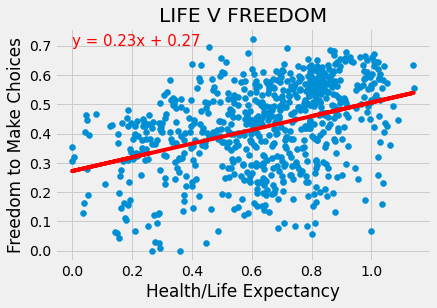

In [12]:
corr = st.pearsonr(x_axis, y_axis)
print(f'The correlation between LIFE V FREEDOM is: {round(corr[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0.0,0.7),fontsize=15,color="red")
plt.xlabel("Health/Life Expectancy")
plt.ylabel("Freedom to Make Choices")
plt.title('LIFE V FREEDOM')
print(f'r value = {rvalue}')
print(f'p value = {pvalue}')
plt.show()

Text(0, 0.5, 'Health/Life Expectancy')

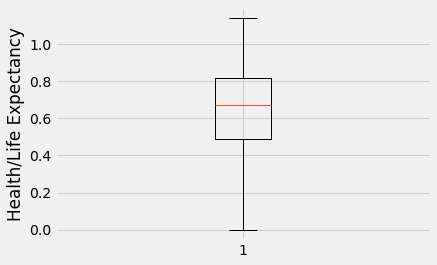

In [9]:
plt.boxplot(x_axis)
plt.ylabel('Health/Life Expectancy')

Text(0, 0.5, 'Freedom')

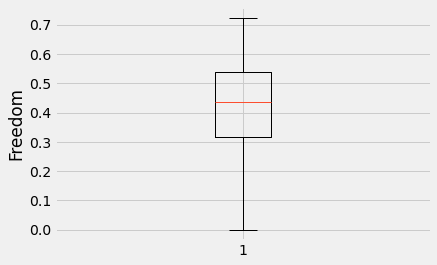

In [10]:
plt.boxplot(y_axis)
plt.ylabel('Freedom')